In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('exchange_rate.csv')

In [3]:
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [4]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [5]:
# Initial Exploration
import matplotlib.pyplot as plt

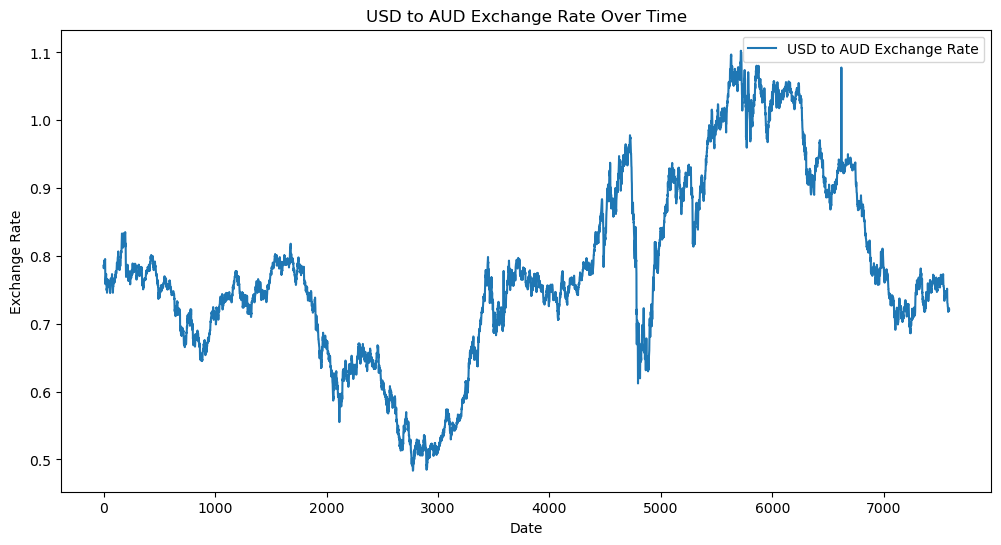

In [6]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Ex_rate'], label='USD to AUD Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('USD to AUD Exchange Rate Over Time')
plt.legend()
plt.show()

In [7]:
#Data Preprocessing
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [8]:
#Model Building - ARIMA
#Parameter Selection for ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

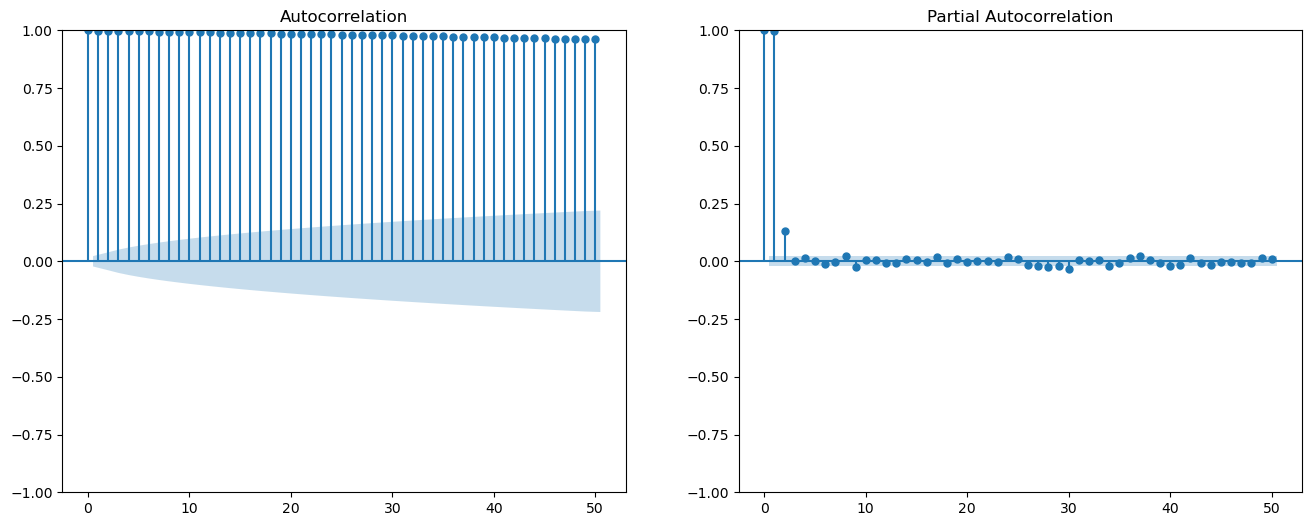

In [9]:
# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(df['Ex_rate'], lags=50, ax=axes[0])
plot_pacf(df['Ex_rate'], lags=50, ax=axes[1])
plt.show()

In [10]:
#Model Fitting
from statsmodels.tsa.arima.model import ARIMA

In [11]:
# Define the ARIMA model
p, d, q = 1, 1, 1  
arima_model = ARIMA(df['Ex_rate'], order=(p, d, q))


In [12]:
# Fit the model
arima_result = arima_model.fit()

In [13]:
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Tue, 06 Aug 2024   AIC                         -56102.322
Time:                        16:52:27   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.608      0.000    3.58e-05    3.62e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2865078.33
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

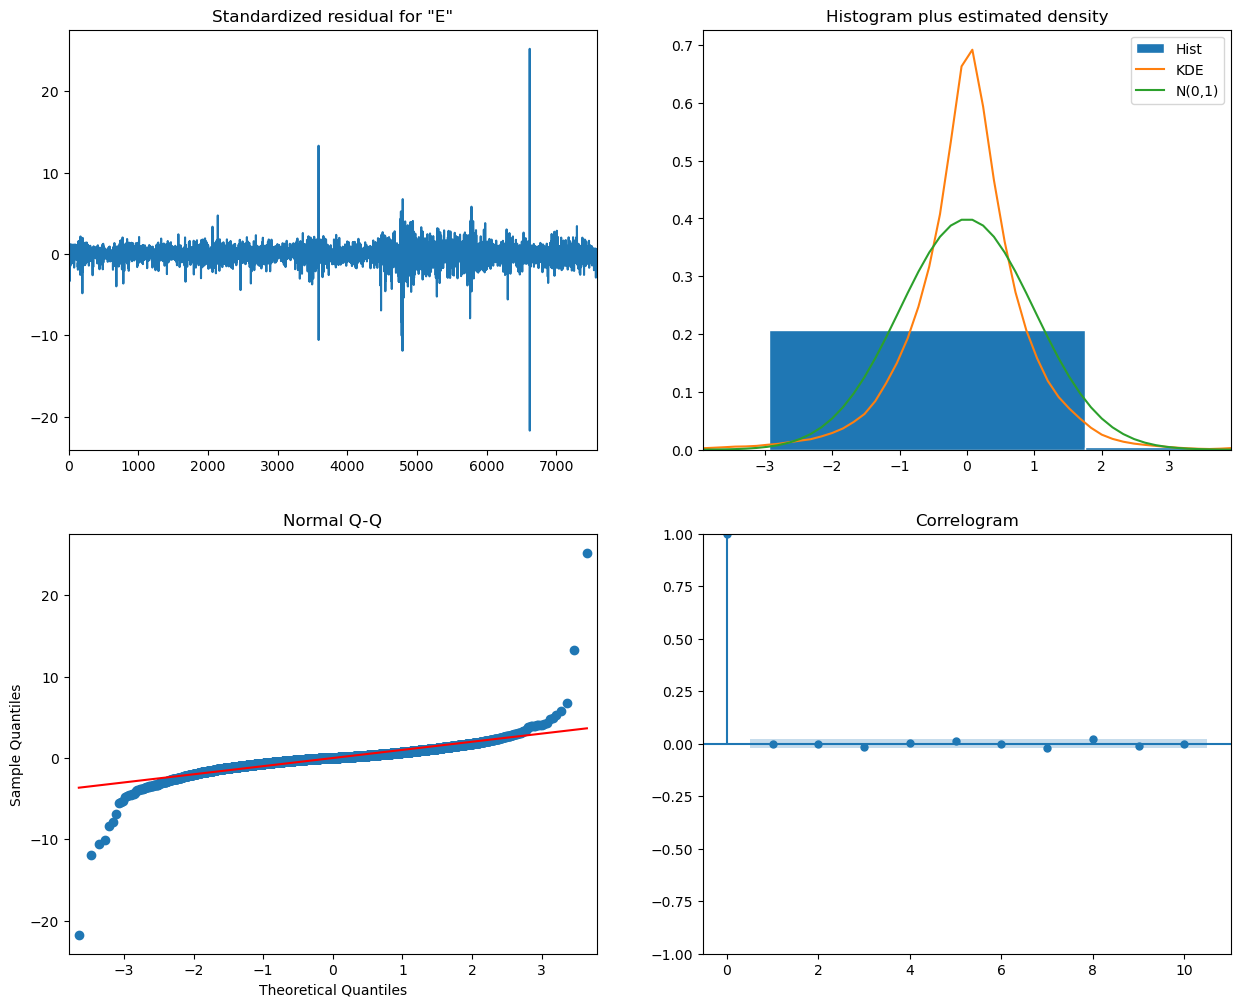

In [14]:
#Diagnostics
# Plot diagnostics
arima_result.plot_diagnostics(figsize=(15, 12))
plt.show()

In [18]:
#Forecasting
# Forecasting
forecast_steps = 30
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, closed='right')

C:\Users\Hp\AppData\Local\Temp\ipykernel_9700\3482723034.py:5: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, closed='right')


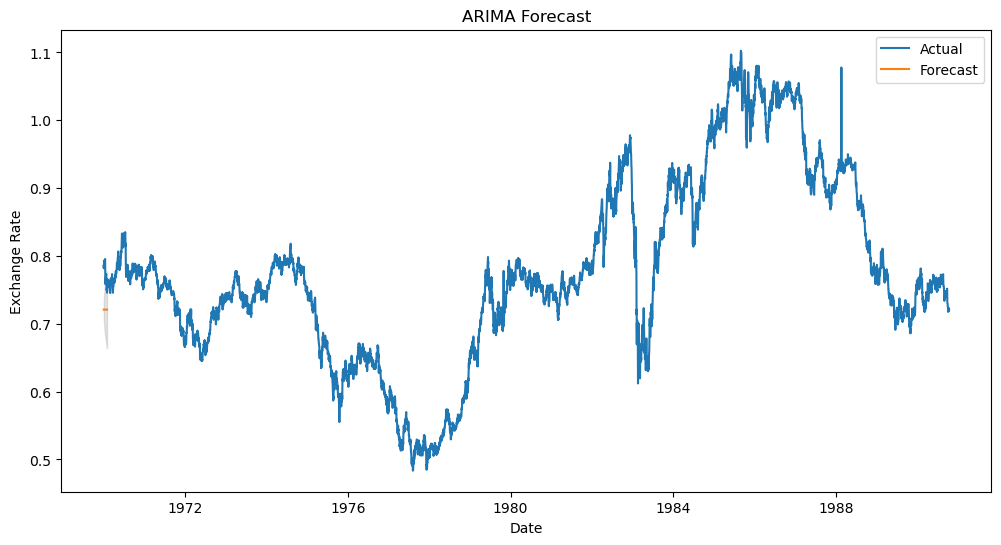

In [19]:
# Plot the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Ex_rate'], label='Actual')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast')
plt.fill_between(forecast_index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='k', alpha=0.1)
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

In [20]:
#Model Building - Exponential Smoothing
#Model Selection
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [21]:
# Define the Exponential Smoothing model
exp_smoothing_model = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal=None, seasonal_periods=12)

In [22]:
# Fit the model
exp_smoothing_result = exp_smoothing_model.fit()

In [23]:
exp_smoothing_result.summary()

Dep. Variable:,Ex_rate,No. Observations:,7588
Model:,ExponentialSmoothing,SSE,0.273
Optimized:,True,AIC,-77641.009
Trend:,Additive,BIC,-77613.272
Seasonal:,None,AICC,-77640.998
Seasonal Periods:,None,Date:,"Tue, 06 Aug 2024"
Box-Cox:,False,Time:,17:01:21
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8700393,alpha,True
smoothing_trend,1.3992e-17,beta,True


In [24]:
# Model Fitting and Forecasting
# Forecasting
exp_smoothing_forecast = exp_smoothing_result.forecast(steps=forecast_steps)


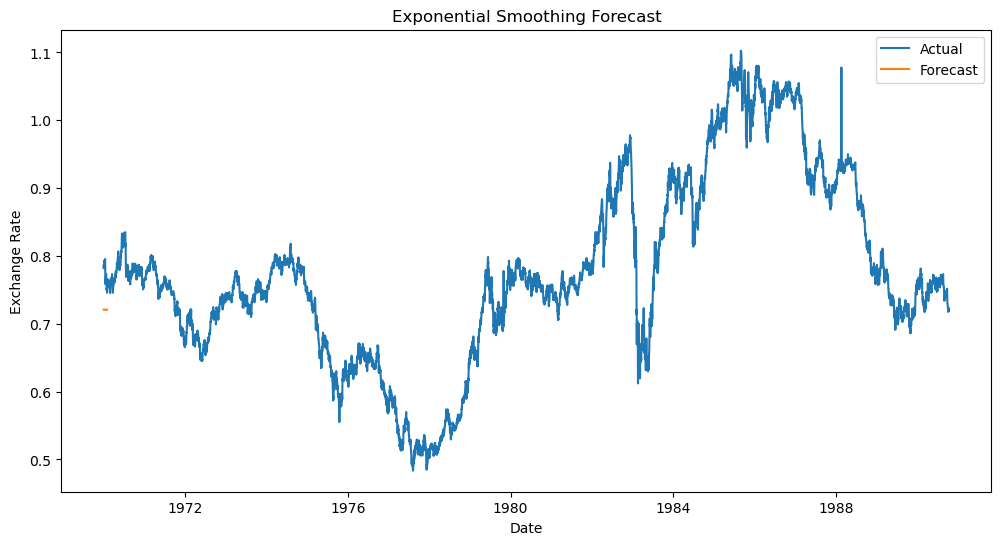

In [25]:
# Plot the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Ex_rate'], label='Actual')
plt.plot(forecast_index, exp_smoothing_forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Exponential Smoothing Forecast')
plt.legend()
plt.show()

In [26]:
#Evaluation and Comparison
#Compute Error Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [27]:
# Generate actual values for comparison (assuming forecast_steps are in the dataset for demonstration)
actual_values = df['Ex_rate'][-forecast_steps:]


In [28]:
# Compute error metrics for ARIMA
arima_forecast_values = forecast.predicted_mean
arima_mae = mean_absolute_error(actual_values, arima_forecast_values)
arima_rmse = mean_squared_error(actual_values, arima_forecast_values, squared=False)

In [29]:
# Compute error metrics for Exponential Smoothing
exp_smoothing_mae = mean_absolute_error(actual_values, exp_smoothing_forecast)
exp_smoothing_rmse = mean_squared_error(actual_values, exp_smoothing_forecast, squared=False)


In [30]:
print(f'ARIMA MAE: {arima_mae}, ARIMA RMSE: {arima_rmse}')
print(f'Exponential Smoothing MAE: {exp_smoothing_mae}, Exponential Smoothing RMSE: {exp_smoothing_rmse}')

ARIMA MAE: 0.01272400648930223, ARIMA RMSE: 0.01698271091275075
Exponential Smoothing MAE: 0.012755723263635966, Exponential Smoothing RMSE: 0.017005200227771498


In [31]:
#Model Comparison
# Based on the computed error metrics, compare the performance of the models
print(f"ARIMA Model - MAE: {arima_mae}, RMSE: {arima_rmse}")
print(f"Exponential Smoothing Model - MAE: {exp_smoothing_mae}, RMSE: {exp_smoothing_rmse}")

ARIMA Model - MAE: 0.01272400648930223, RMSE: 0.01698271091275075
Exponential Smoothing Model - MAE: 0.012755723263635966, RMSE: 0.017005200227771498


In [ ]:
#Model Performance

1.ARIMA Model:

MAE: 0.01272400648930223
RMSE: 0.01698271091275075

2.Exponential Smoothing Model:

MAE: 0.012755723263635966
RMSE: 0.017005200227771498

#Evaluation and Comparison

* Mean Absolute Error (MAE):

The MAE for the ARIMA model is 0.012724, while for the Exponential Smoothing model, it is 0.012756.
Both values are very close, indicating that on average, the magnitude of errors in predictions for both models is similar. However, the ARIMA model has a slightly lower MAE, suggesting it has a marginally better fit in terms of average error magnitude.

* Root Mean Squared Error (RMSE):

The RMSE for the ARIMA model is 0.016983, while for the Exponential Smoothing model, it is 0.017005.

Again, both values are very close, indicating similar performance in terms of the square of the prediction errors.
The ARIMA model has a slightly lower RMSE, suggesting it handles larger errors better than the Exponential Smoothing model.

In [ ]:
#Conclusion
** Both models perform similarly, as indicated by the very close values of MAE and RMSE.

** The ARIMA model has a slight edge over the Exponential Smoothing model in both MAE and RMSE,
suggesting it fits the data a bit better.

**The difference in performance is minimal, so the choice of model could also consider other factors such as ease of implementation,
computational efficiency, and interpretability.

In [ ]:
##Insights

1.ARIMA Model:

Captures more complex temporal dependencies and patterns in the data.
Might be more sensitive to parameter selection, but once well-tuned,
it can provide very accurate forecasts.

2.Exponential Smoothing Model:

Simpler to implement and understand.
Requires less computational power and is generally faster to run.
Suitable for data with less complex patterns or when interpretability and ease of implementation are prioritized.

In [ ]:
Given the closeness of the results, either model could be used effectively for forecasting exchange rates in this dataset.
However, based on the provided metrics, the ARIMA model slightly outperforms the Exponential Smoothing model, making it a marginally better choice for this particular task.